<a href="https://colab.research.google.com/github/HassanSamkari/Applied-Data-Science-Capstone/blob/master/Fashion_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [0]:
sales = pd.read_csv('/content/drive/My Drive/project for colab/data/sales_stock.csv')
products = pd.read_csv('/content/drive/My Drive/project for colab/data/products.csv')
positions = pd.read_csv('/content/drive/My Drive/project for colab/data/positions.csv')


In [5]:
sales.head()

,date_number,product_id,color_id,size_id,sales,stock
0,0,310130,78467031,7026791,1,93
1,0,310130,78467031,8015276,2,62
2,0,310130,78467031,452052101,1,18
3,0,310130,78467031,541898038,2,42
4,0,310130,78467031,558685710,3,113


In [6]:
products.head()

,product_id,family_id,subfamily_id,price
0,151926,396066037,335531561,25.95
1,213413,552529755,11509337,19.95
2,310130,679611953,533441312,12.95
3,373883,775013441,62518413,17.95
4,455200,998145072,490222156,29.95


In [7]:
positions.head()

,date_number,product_id,category_id,position
0,0,4450020,4461548,17
1,0,42147334,4461548,4
2,0,81131830,4461548,35
3,0,84035833,4461548,38
4,0,125252584,4461548,39


In [8]:
sales_df=pd.merge(products, sales, left_on='product_id', right_on='product_id')
sales_df.head()

,product_id,family_id,subfamily_id,price,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,59,909958217,111455099,0,17
1,151926,396066037,335531561,25.95,59,909958217,242364222,3,63
2,151926,396066037,335531561,25.95,59,909958217,513017386,1,33
3,151926,396066037,335531561,25.95,59,909958217,820445075,1,42
4,151926,396066037,335531561,25.95,60,909958217,54666687,2,72


In [9]:
stay_columns=['product_id','family_id','subfamily_id','price'] 
sales_final_df = pd.DataFrame(sales_df.groupby(stay_columns).sum()['sales']).reset_index()
sales_final_df.loc[:,'stock']=pd.DataFrame(sales_df.groupby(stay_columns).sum()[ 'stock']).reset_index()['stock']
sales_final_df.head()

,product_id,family_id,subfamily_id,price,sales,stock
0,151926,396066037,335531561,25.95,167,7995
1,213413,552529755,11509337,19.95,757,56646
2,310130,679611953,533441312,12.95,578,49639
3,455200,998145072,490222156,29.95,24,2258
4,571044,831347344,750943270,15.95,591,18868


In [0]:
positions.loc[:,'high_rank']=positions.loc[:,'position'] 
high_rank=pd.DataFrame(positions.groupby(['date_number','product_id']).min()['position'] ).reset_index()
positions=positions.drop('high_rank', axis=1)

In [0]:
positions.loc[:,'low_rank']=positions.loc[:,'position'] 
low_rank=pd.DataFrame(positions.groupby(['date_number','product_id']).max()['position'] ).reset_index()
positions=positions.drop('low_rank', axis=1)

In [0]:
positions.loc[:,'rank_mean']=positions.loc[:,'position'] 
rank_mean=pd.DataFrame(positions.groupby(['date_number','product_id']).mean()['position']).reset_index()
rank_mean=round(rank_mean)
positions=positions.drop('rank_mean', axis=1)

In [0]:
positions=rank_mean.copy().rename(columns={"position": "rank_mean"}) 
positions.loc[:,'high_rank']=high_rank['position'] 
positions.loc[:,'low_rank']=low_rank['position'] 

In [30]:
df=pd.merge(sales_final_df, positions,  left_on=['product_id'], right_on=['product_id']) 
df.head()

,product_id,family_id,subfamily_id,price,sales,stock,date_number,rank_mean,high_rank,low_rank
0,151926,396066037,335531561,25.95,167,7995,59,36.0,9,62
1,151926,396066037,335531561,25.95,167,7995,60,37.0,10,64
2,151926,396066037,335531561,25.95,167,7995,61,38.0,10,65
3,151926,396066037,335531561,25.95,167,7995,62,38.0,10,65
4,151926,396066037,335531561,25.95,167,7995,63,38.0,10,63


In [0]:
df['rank_level'] = pd.cut(df['rank_mean'],bins=2, labels=False)

In [32]:
df['product_status'] = df['rank_level'].apply(lambda x: "denial" if (x>0)  else "deal")
df=df.drop(columns=('rank_mean'))
df.head()

,product_id,family_id,subfamily_id,price,sales,stock,date_number,high_rank,low_rank,rank_level,product_status
0,151926,396066037,335531561,25.95,167,7995,59,9,62,0,deal
1,151926,396066037,335531561,25.95,167,7995,60,10,64,0,deal
2,151926,396066037,335531561,25.95,167,7995,61,10,65,0,deal
3,151926,396066037,335531561,25.95,167,7995,62,10,65,0,deal
4,151926,396066037,335531561,25.95,167,7995,63,10,63,0,deal


In [0]:
train = df.loc[df['date_number'] <= 46].reset_index(drop=True)
test = df.loc[df['date_number'] >= 46].reset_index(drop=True)

In [34]:
train.head()

,product_id,family_id,subfamily_id,price,sales,stock,date_number,high_rank,low_rank,rank_level,product_status
0,213413,552529755,11509337,19.95,757,56646,4,13,254,0,deal
1,213413,552529755,11509337,19.95,757,56646,5,13,255,0,deal
2,213413,552529755,11509337,19.95,757,56646,6,13,37,0,deal
3,213413,552529755,11509337,19.95,757,56646,7,13,37,0,deal
4,213413,552529755,11509337,19.95,757,56646,8,4,39,0,deal


In [0]:
X_train=train.drop(['product_status'], axis=1) 
y_train=train.loc[:,'product_status']

In [45]:
y_train[0:6]

0    deal
1    deal
2    deal
3    deal
4    deal
5    deal
Name: product_status, dtype: object

In [46]:
X_train[0:6]

,product_id,family_id,subfamily_id,price,sales,stock,date_number,high_rank,low_rank,rank_level
0,213413,552529755,11509337,19.95,757,56646,4,13,254,0
1,213413,552529755,11509337,19.95,757,56646,5,13,255,0
2,213413,552529755,11509337,19.95,757,56646,6,13,37,0
3,213413,552529755,11509337,19.95,757,56646,7,13,37,0
4,213413,552529755,11509337,19.95,757,56646,8,4,39,0
5,213413,552529755,11509337,19.95,757,56646,9,8,97,0


In [0]:
X_test=test.drop(['product_status'], axis=1) 
y_test=test.loc[:,'product_status']

In [0]:
from sklearn import preprocessing
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)

In [0]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1, n_jobs=-1) 
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.5s


KeyboardInterrupt: ignored

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
from math import sqrt

In [0]:
predictions = rf.predict(X_test)

In [0]:
mean_squared_error(y_test, predictions, squared=False)

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

In [0]:
predictions.head()

In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['deal', 'deal', 'deal', 'deal', 'deal'], dtype=object)

In [52]:
a = np.count_nonzero(yhat == 'deal')
print('Total number of deal product is ',a)
#print(b = np.count_nonzero(LR_yhat == 'denial'))

Total number of deal product is  335478


In [53]:
b = np.count_nonzero(yhat == 'denial')
print('Total number of denial product is ',b)

Total number of denial product is  0


In [0]:
import matplotlib.pyplot as plt

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['denial','deal']))

[[     0  18143]
 [     0 317335]]


Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


<Figure size 432x288 with 0 Axes>

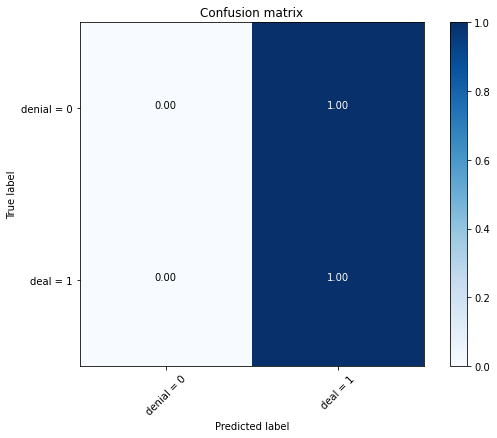

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['denial','deal'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['denial = 0','deal = 1'],normalize= True,  title='Confusion matrix')
